In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [3]:
df=pd.read_csv(r"C:\Users\Akash Goel\Downloads\bank (1).csv")

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [7]:
cat_cols = df.dtypes[df.dtypes=='object'].index

In [8]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [9]:
def uni_cat(data,x):
    nuni = data[x].nunique()
    ncat = data[x].unique()
    null = data[x].value_counts(dropna=False,ascending=False)
    f1 = pd.DataFrame(null)
    null1 = data[x].value_counts(dropna=False,ascending=False,normalize=True)
    ff = pd.concat([null,null1],axis=1)
    print("Number of unique categories:",nuni)
    print()
    print("Unique Categories:",ncat)
    print()
    print("Null value count:\n",ff)
    print()
    
    plt.figure(figsize=(16,8))
    sns.countplot(x=data[x])
    plt.show()

Number of unique categories: 12

Unique Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Null value count:
                count  proportion
job                             
admin.         10422    0.253035
blue-collar     9254    0.224677
technician      6743    0.163713
services        3969    0.096363
management      2924    0.070992
retired         1720    0.041760
entrepreneur    1456    0.035350
self-employed   1421    0.034500
housemaid       1060    0.025736
unemployed      1014    0.024619
student          875    0.021244
unknown          330    0.008012



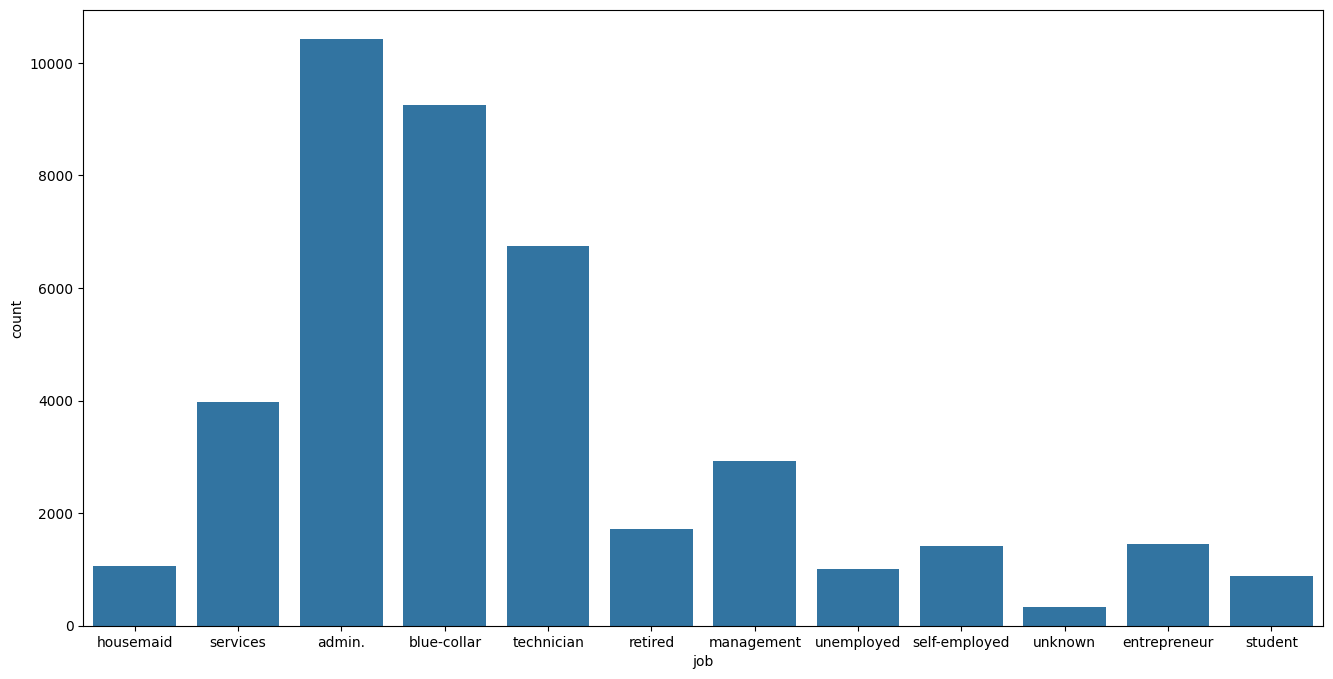

In [10]:
uni_cat(df,'job')

In [11]:
df['job'] = df['job'].replace({'self-employed':'entrepreneur','technician':'services'})

Number of unique categories: 10

Unique Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'retired' 'management'
 'unemployed' 'entrepreneur' 'unknown' 'student']

Null value count:
               count  proportion
job                            
services      10712    0.260076
admin.        10422    0.253035
blue-collar    9254    0.224677
management     2924    0.070992
entrepreneur   2877    0.069850
retired        1720    0.041760
housemaid      1060    0.025736
unemployed     1014    0.024619
student         875    0.021244
unknown         330    0.008012



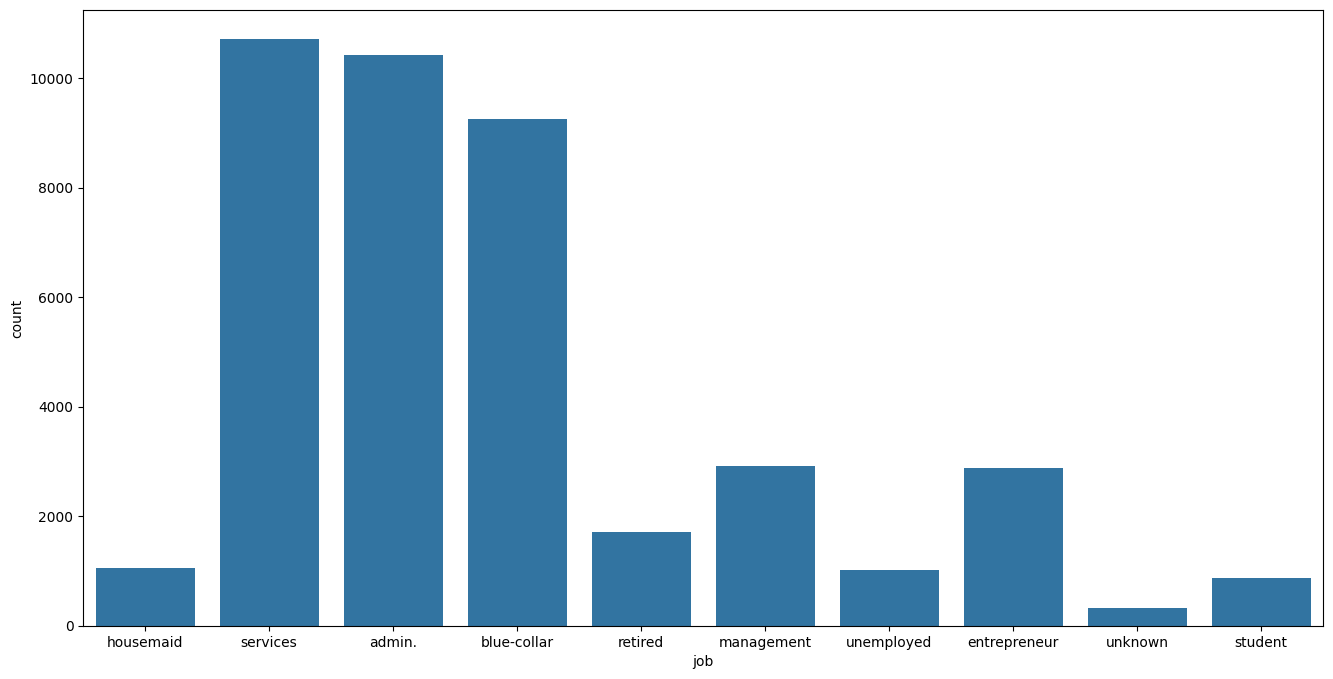

In [12]:
uni_cat(df,'job')

In [13]:
df.duplicated().sum()

12

In [14]:
df.drop_duplicates(inplace=True)

Number of unique categories: 10

Unique Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'retired' 'management'
 'unemployed' 'entrepreneur' 'unknown' 'student']

Null value count:
               count  proportion
job                            
services      10706    0.260006
admin.        10419    0.253036
blue-collar    9253    0.224718
management     2924    0.071012
entrepreneur   2877    0.069871
retired        1718    0.041723
housemaid      1060    0.025743
unemployed     1014    0.024626
student         875    0.021250
unknown         330    0.008014



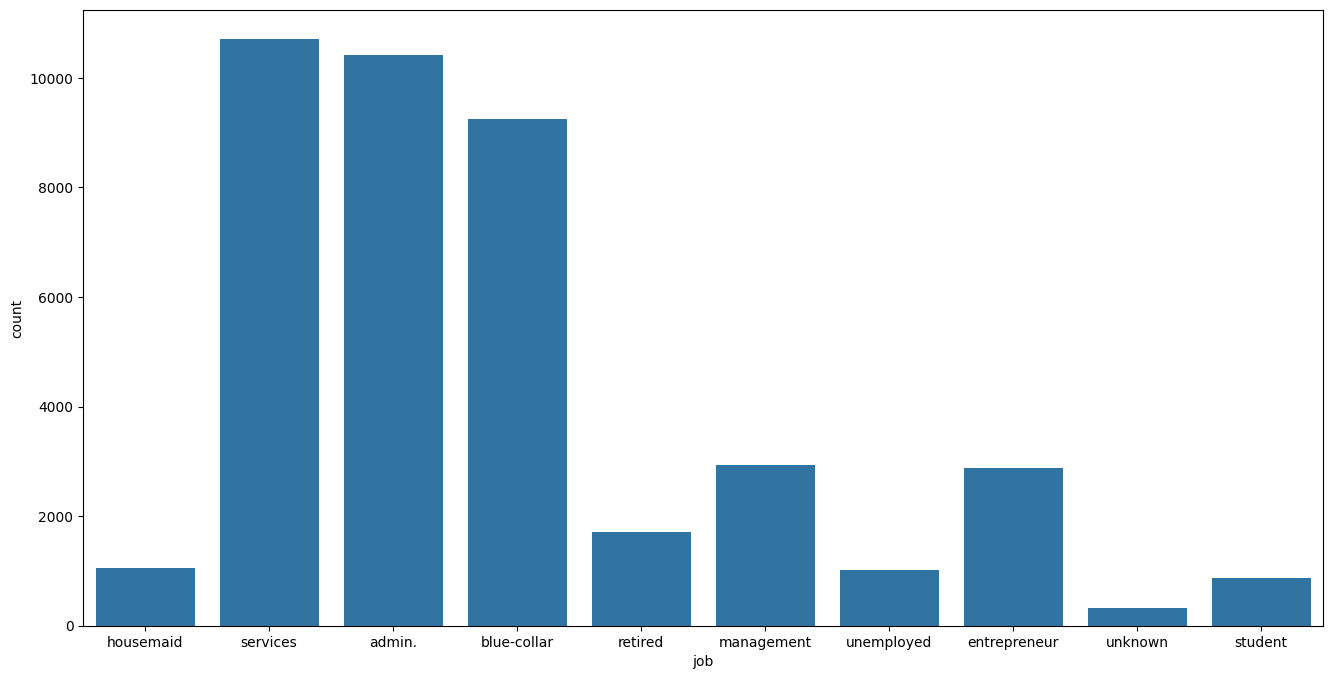

In [15]:
uni_cat(df,'job')

Number of unique categories: 4

Unique Categories: ['married' 'single' 'divorced' 'unknown']

Null value count:
           count  proportion
marital                    
married   24921    0.605231
single    11564    0.280843
divorced   4611    0.111983
unknown      80    0.001943



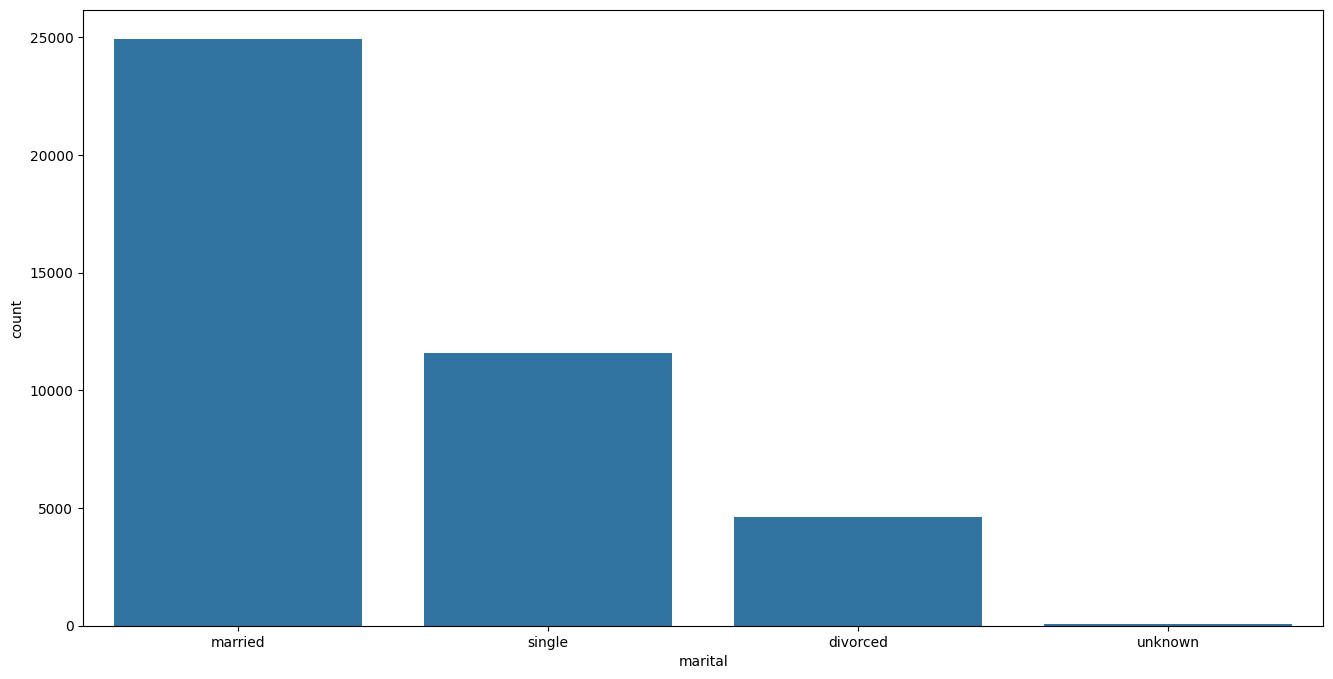

In [16]:
uni_cat(df,'marital')

In [17]:
df['marital'] = df['marital'].replace({'unknown':'divorced'})

In [18]:
df['job'] = df['job'].replace({'unknown':'unemployed'})

Number of unique categories: 3

Unique Categories: ['married' 'single' 'divorced']

Null value count:
           count  proportion
marital                    
married   24921    0.605231
single    11564    0.280843
divorced   4691    0.113926



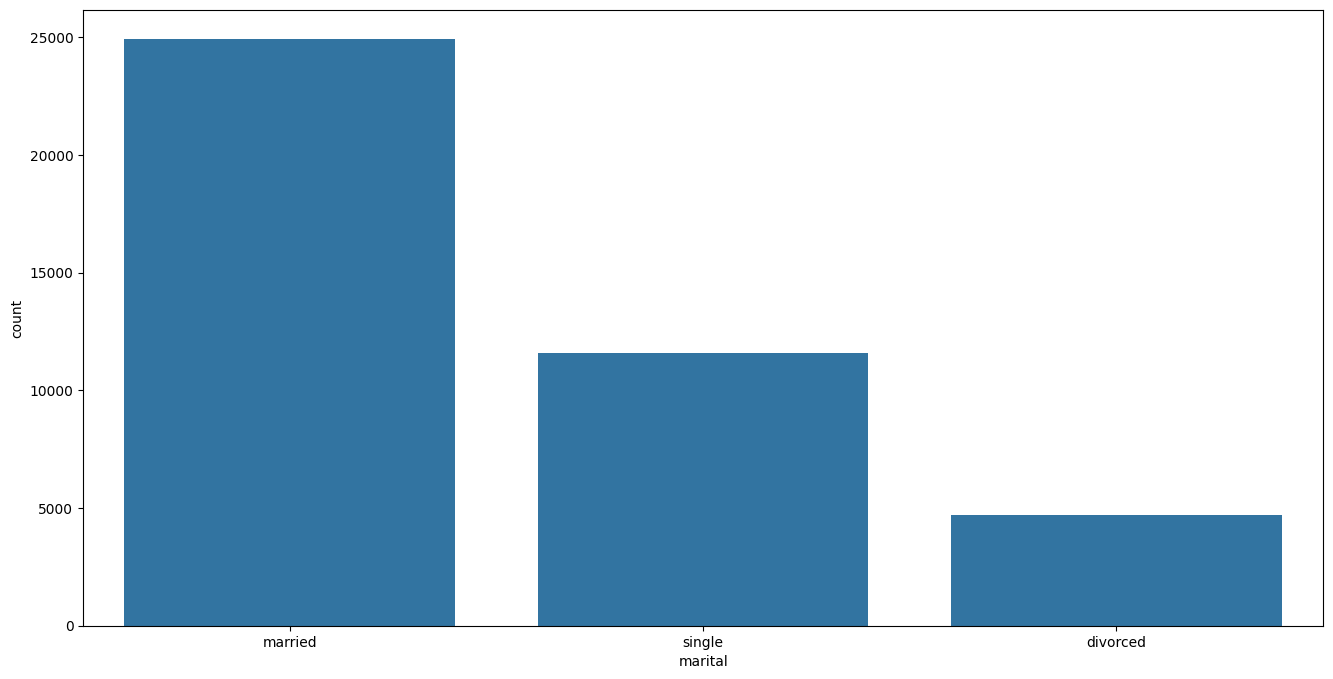

In [19]:
uni_cat(df,'marital')

Number of unique categories: 8

Unique Categories: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Null value count:
                      count  proportion
education                             
university.degree    12164    0.295415
high.school           9512    0.231008
basic.9y              6045    0.146809
professional.course   5240    0.127259
basic.4y              4176    0.101418
basic.6y              2291    0.055639
unknown               1730    0.042015
illiterate              18    0.000437



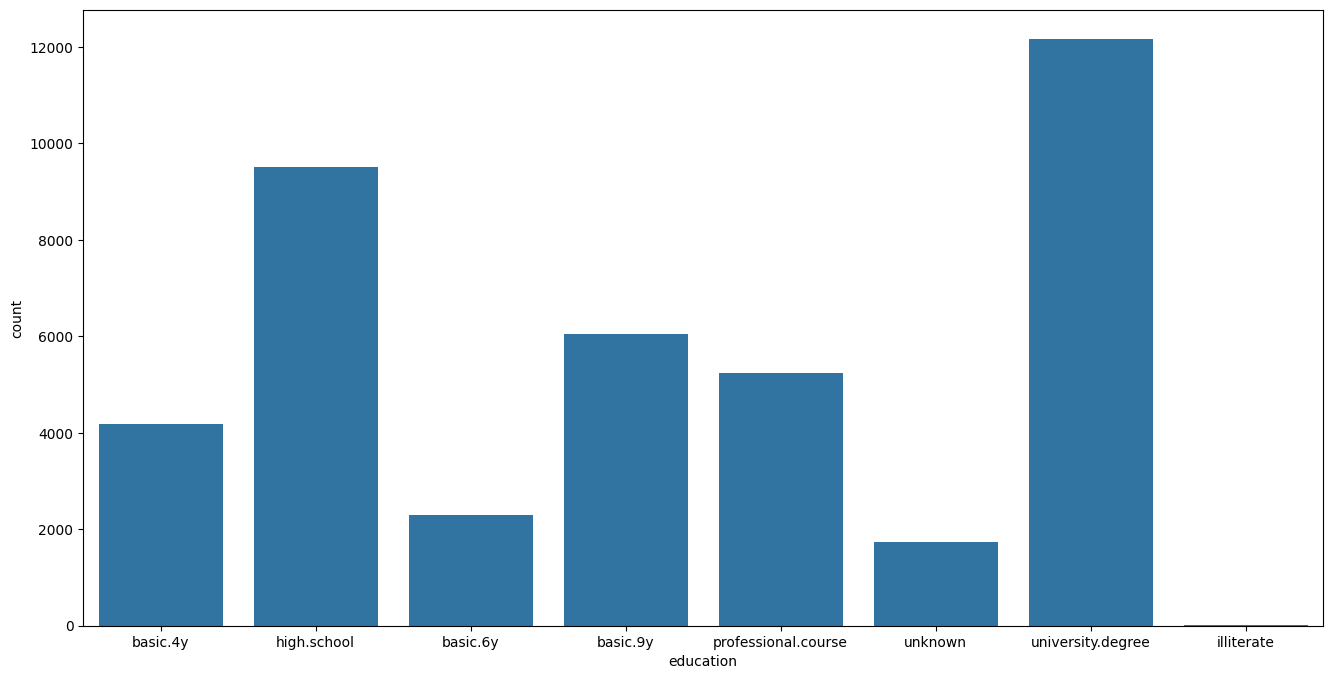

In [20]:
uni_cat(df,'education')

In [21]:
df['education'] = df['education'].replace({'illiterate':'unknown'})

In [22]:
df['education'] = df['education'].replace({'basic.9y':'school','basic.4y':'school','basic.6y':"school"})

Number of unique categories: 5

Unique Categories: ['school' 'high.school' 'professional.course' 'unknown'
 'university.degree']

Null value count:
                      count  proportion
education                             
school               12512    0.303866
university.degree    12164    0.295415
high.school           9512    0.231008
professional.course   5240    0.127259
unknown               1748    0.042452



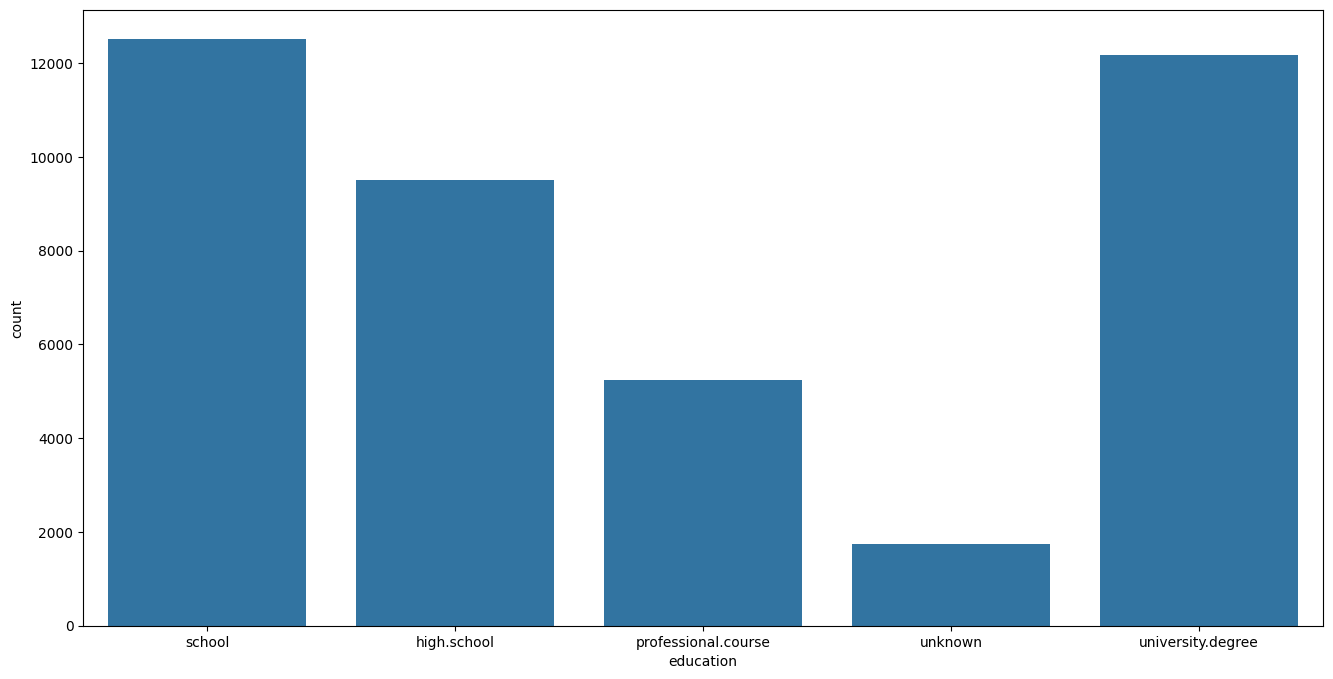

In [23]:
uni_cat(df,'education')

Number of unique categories: 3

Unique Categories: ['no' 'unknown' 'yes']

Null value count:
          count  proportion
default                   
no       32577    0.791165
unknown   8596    0.208762
yes          3    0.000073



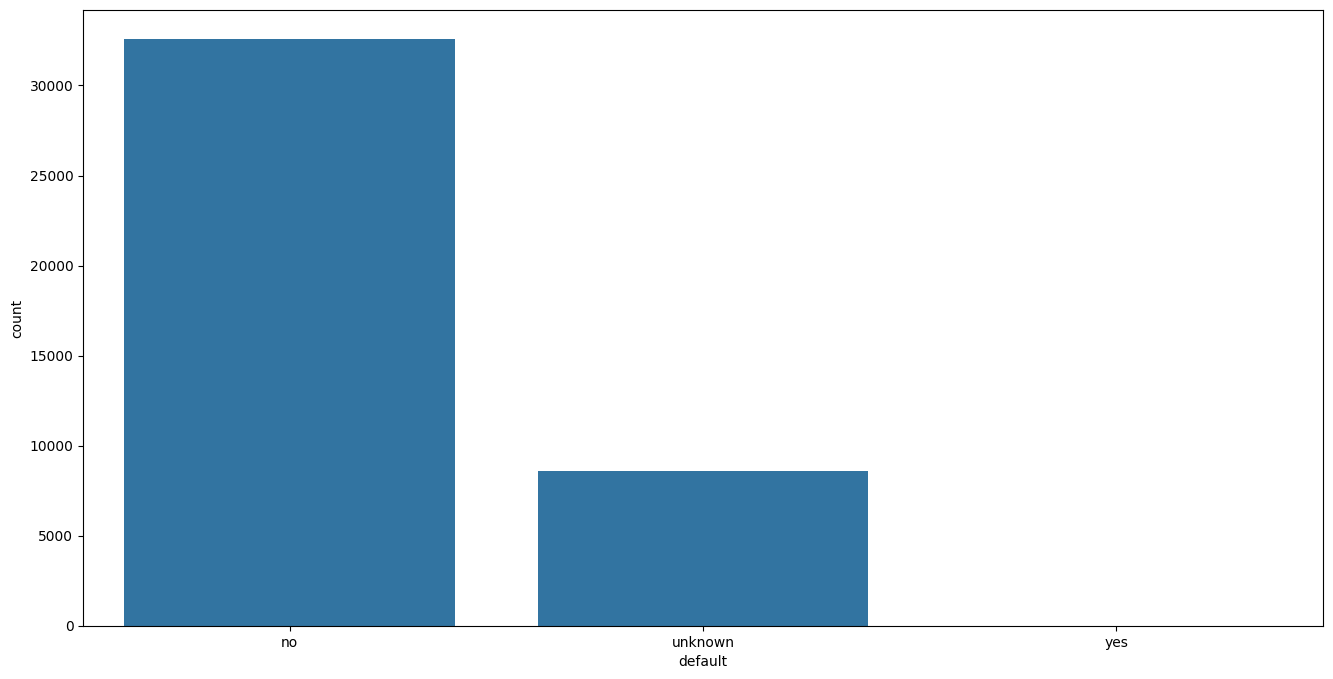

In [24]:
uni_cat(df,'default')

In [25]:
df['default'] = df['default'].replace({"yes":"unknown"})

Number of unique categories: 3

Unique Categories: ['no' 'yes' 'unknown']

Null value count:
          count  proportion
housing                   
yes      21571    0.523873
no       18615    0.452084
unknown    990    0.024043



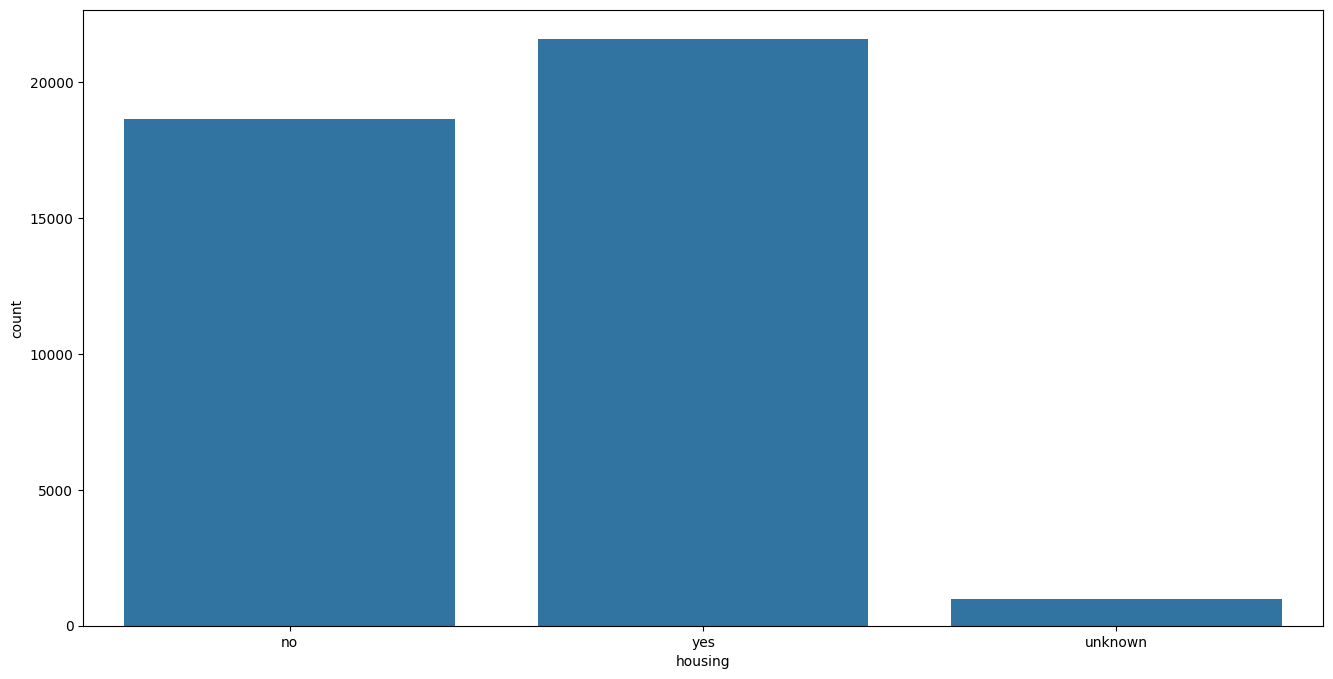

In [26]:
uni_cat(df,'housing')

In [27]:
df['housing'] = df['housing'].replace({"unknown":"no"})

Number of unique categories: 2

Unique Categories: ['no' 'yes']

Null value count:
          count  proportion
housing                   
yes      21571    0.523873
no       19605    0.476127



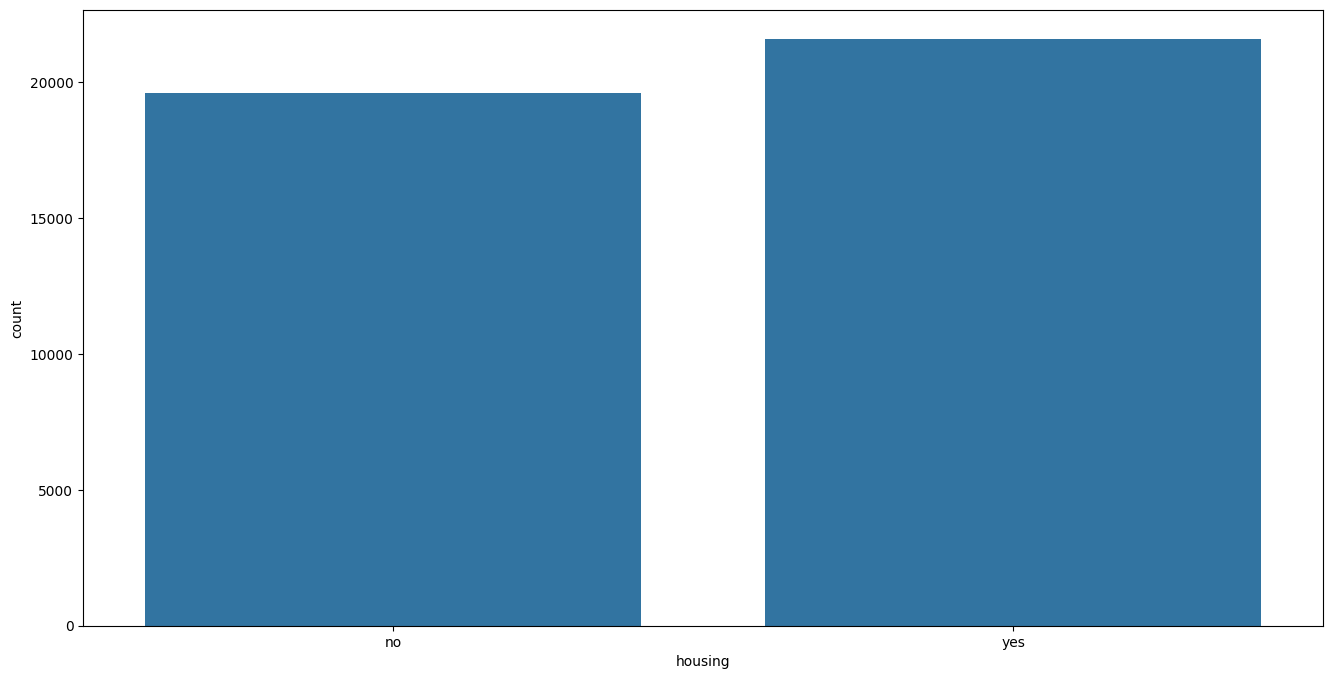

In [28]:
uni_cat(df,'housing')

Number of unique categories: 3

Unique Categories: ['no' 'yes' 'unknown']

Null value count:
          count  proportion
loan                      
no       33938    0.824218
yes       6248    0.151739
unknown    990    0.024043



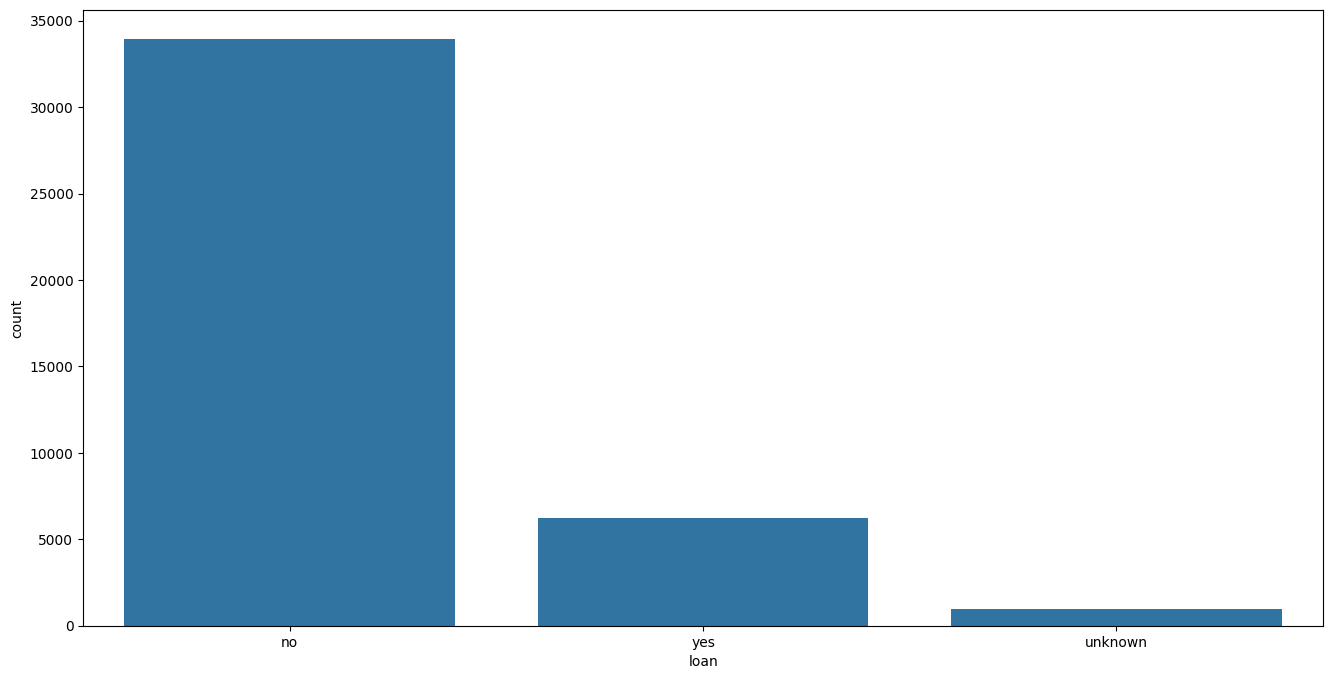

In [29]:
uni_cat(df,'loan')

In [30]:
df['loan'] = df['loan'].replace({"unknown":"yes"})

Number of unique categories: 2

Unique Categories: ['no' 'yes']

Null value count:
       count  proportion
loan                   
no    33938    0.824218
yes    7238    0.175782



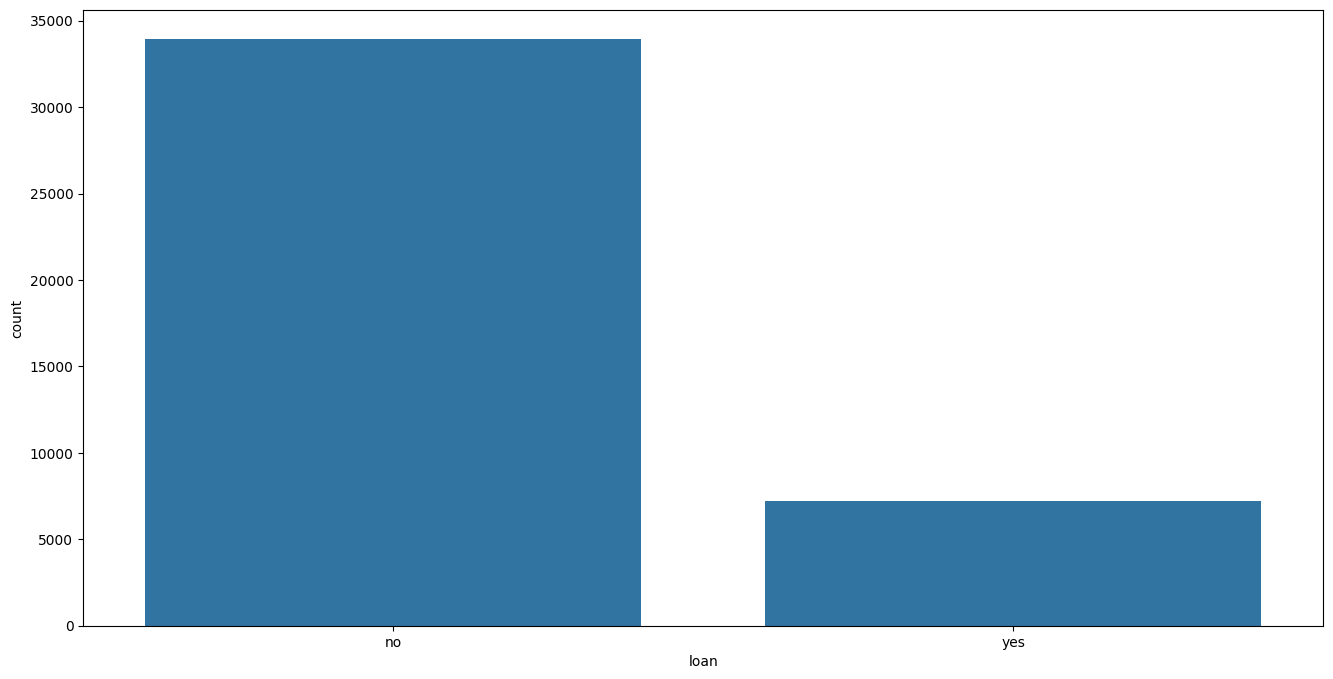

In [31]:
uni_cat(df,'loan')

Number of unique categories: 10

Unique Categories: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Null value count:
        count  proportion
month                   
may    13767    0.334345
jul     7169    0.174106
aug     6176    0.149990
jun     5318    0.129153
nov     4100    0.099573
apr     2631    0.063896
oct      717    0.017413
sep      570    0.013843
mar      546    0.013260
dec      182    0.004420



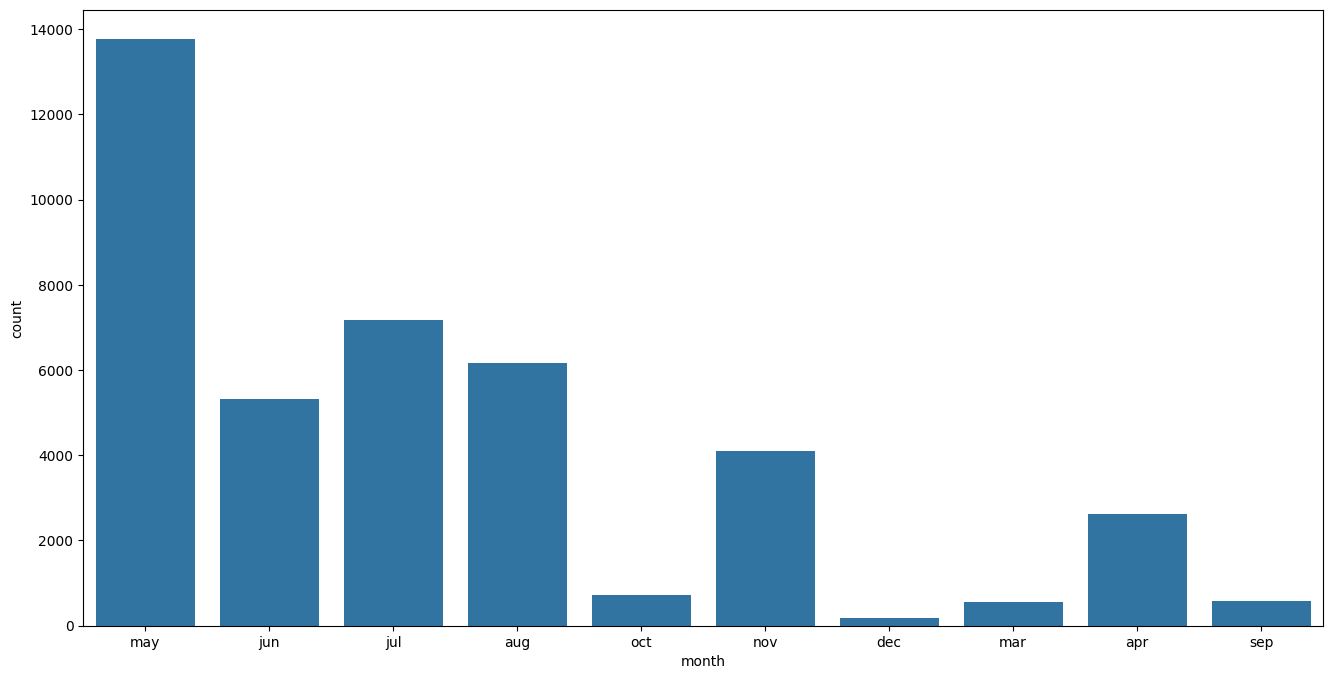

In [32]:
uni_cat(df,'month')

Number of unique categories: 5

Unique Categories: ['mon' 'tue' 'wed' 'thu' 'fri']

Null value count:
              count  proportion
day_of_week                   
thu           8618    0.209297
mon           8512    0.206722
wed           8134    0.197542
tue           8086    0.196377
fri           7826    0.190062



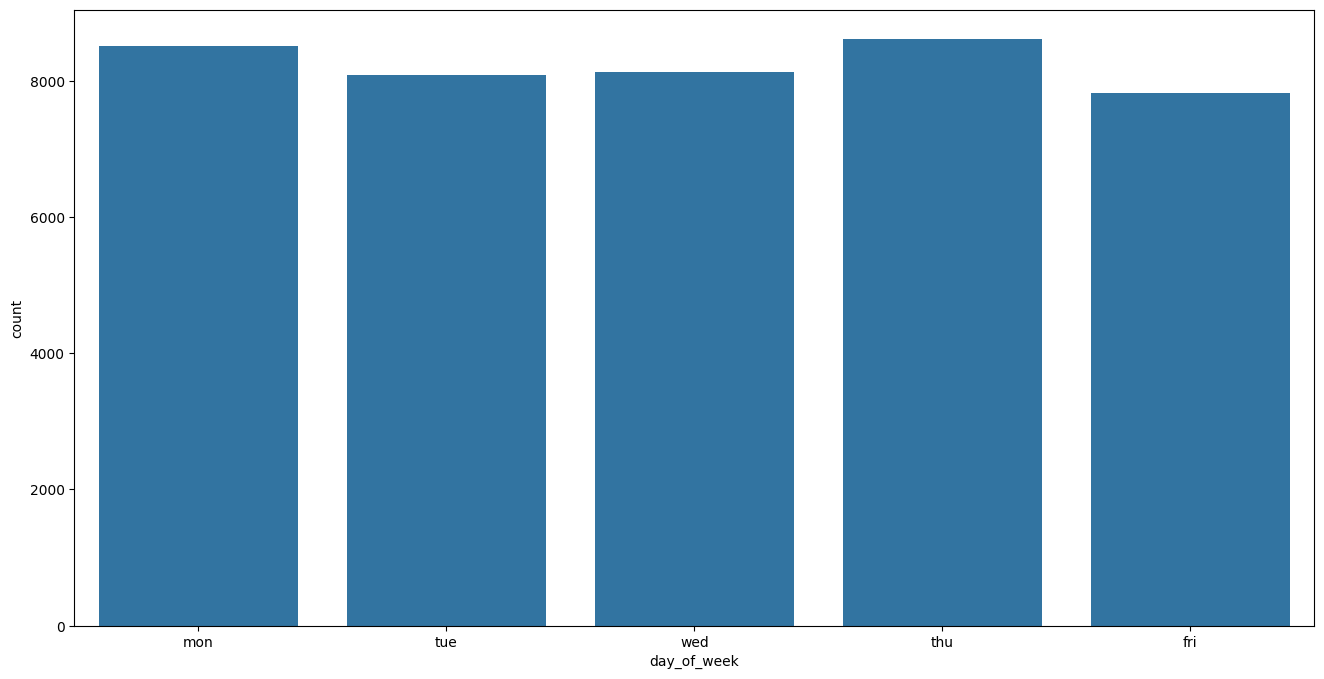

In [33]:
uni_cat(df,'day_of_week')

Number of unique categories: 3

Unique Categories: ['nonexistent' 'failure' 'success']

Null value count:
              count  proportion
poutcome                      
nonexistent  35551    0.863391
failure       4252    0.103264
success       1373    0.033345



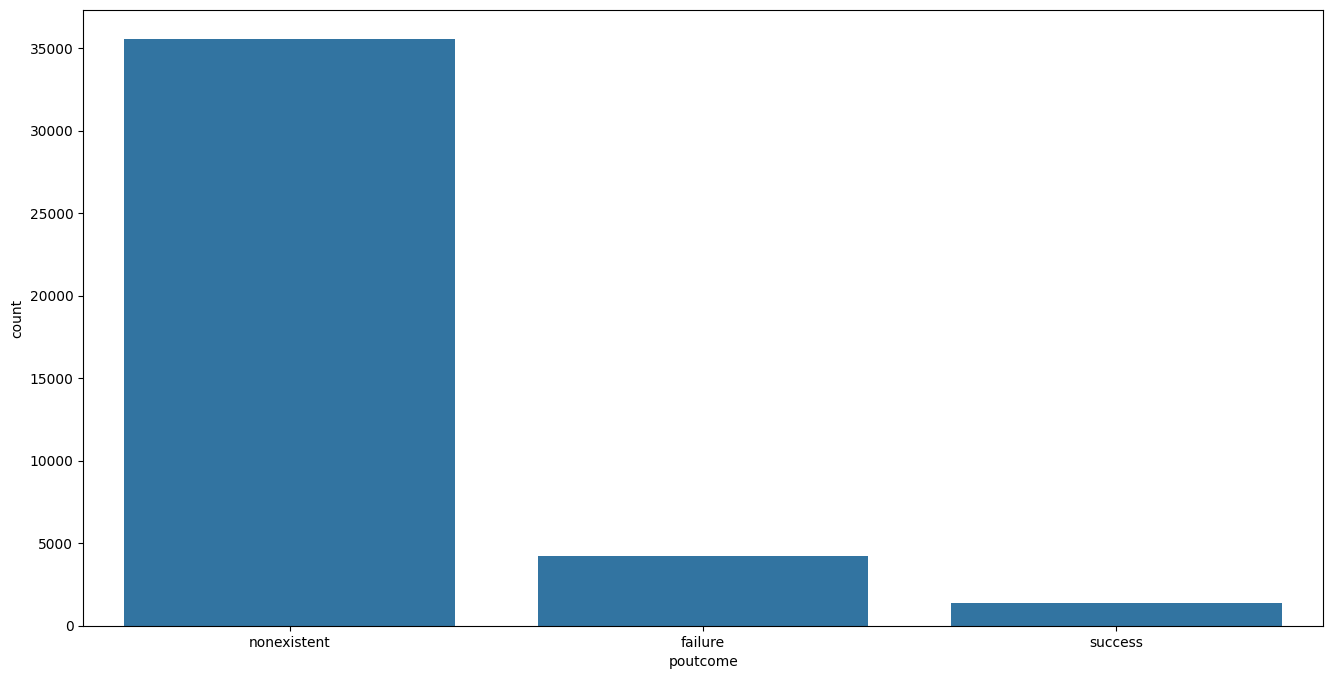

In [34]:
uni_cat(df,'poutcome')

In [35]:
df['y'] = df['y'].replace({'no':0,'yes':1})

Number of unique categories: 2

Unique Categories: ['telephone' 'cellular']

Null value count:
            count  proportion
contact                     
cellular   26135    0.634714
telephone  15041    0.365286



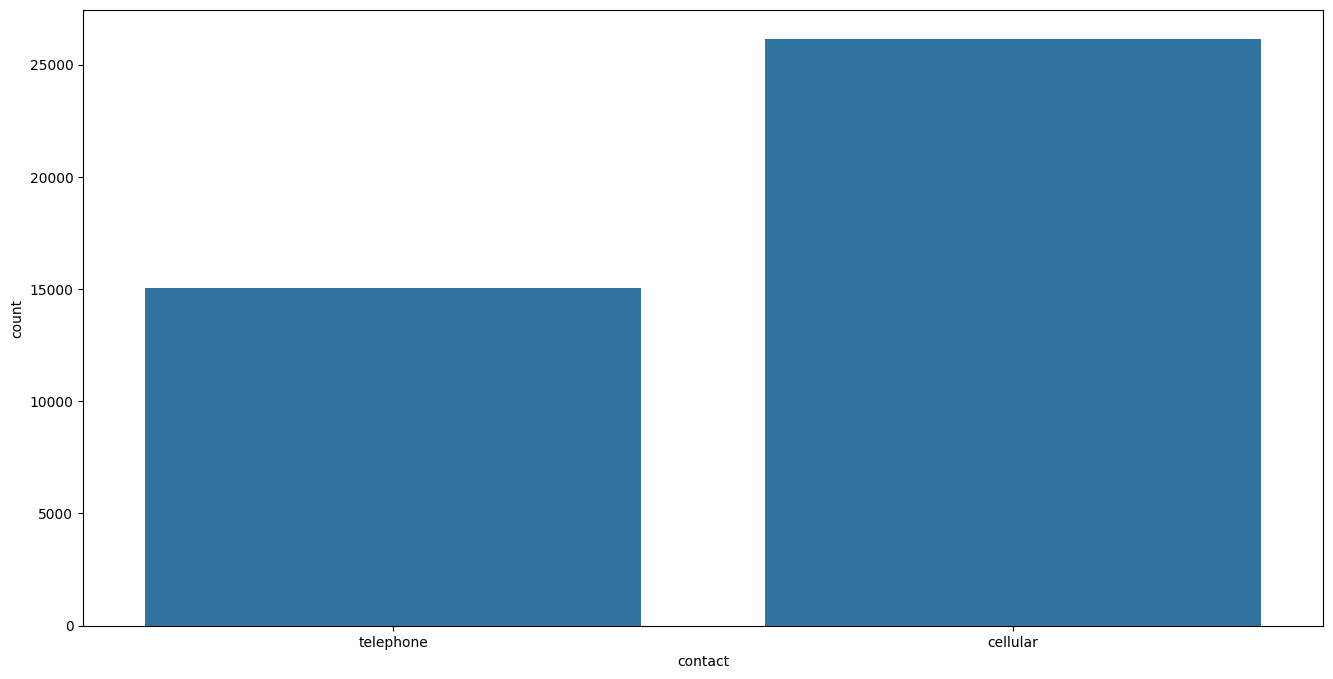

In [36]:
uni_cat(df,'contact')

In [37]:
num_cols = df.dtypes[df.dtypes!='object'].index
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
df['pdays'] = 1/df['pdays']

In [39]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,school,no,no,no,telephone,may,mon,...,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,school,no,no,no,telephone,may,mon,...,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41186,44,services,married,professional.course,no,no,no,cellular,nov,fri,...,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1


Number of unique categories: 10

Unique Categories: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

Null value count:
               count  proportion
emp.var.rate                   
 1.4          16228    0.394113
-1.8           9182    0.222994
 1.1           7762    0.188508
-0.1           3682    0.089421
-2.9           1662    0.040363
-3.4           1070    0.025986
-1.7            773    0.018773
-1.1            635    0.015422
-3.0            172    0.004177
-0.2             10    0.000243



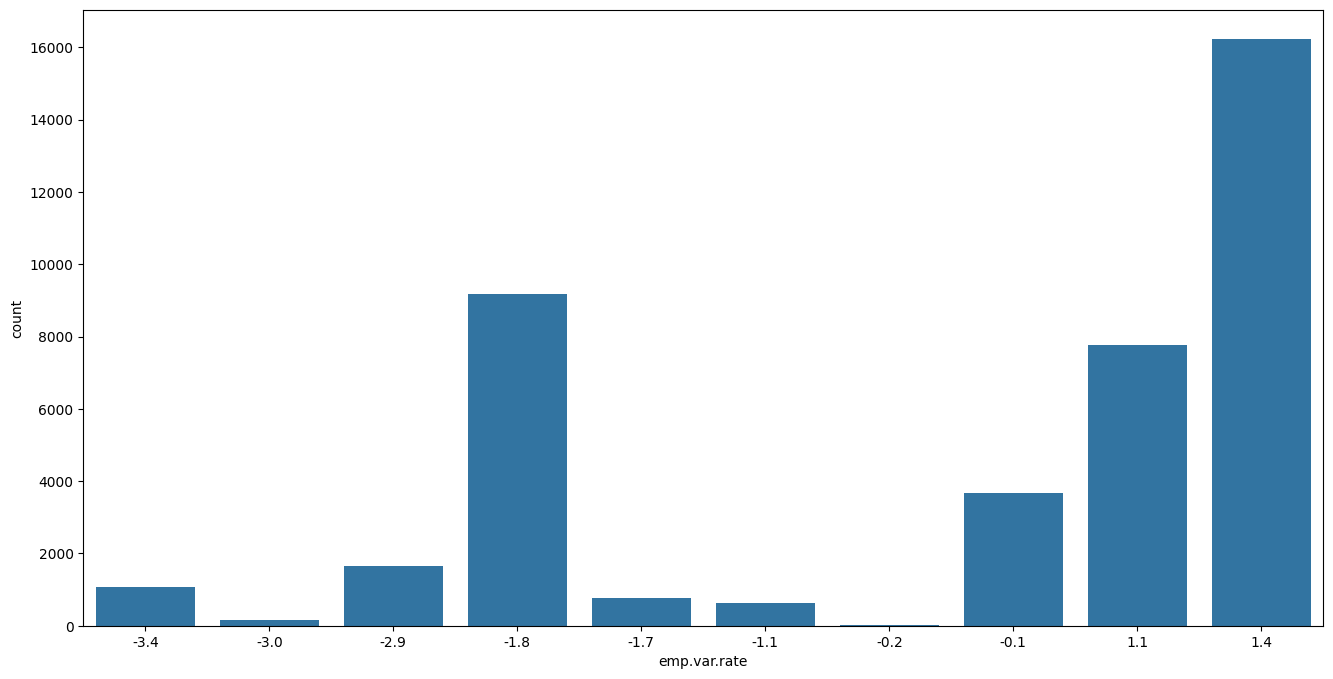

In [40]:
uni_cat(df,'emp.var.rate')

In [41]:
df.drop(['contact','nr.employed'],axis=1,inplace=True)

In [42]:
df

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,school,no,no,no,may,mon,261,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,0
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,0
2,37,services,married,high.school,no,yes,no,may,mon,226,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,0
3,40,admin.,married,school,no,no,no,may,mon,151,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,no,yes,may,mon,307,1,0.001001,0,nonexistent,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,1
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,0
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,0
41186,44,services,married,professional.course,no,no,no,nov,fri,442,1,0.001001,0,nonexistent,-1.1,94.767,-50.8,1.028,1


In [43]:
df.drop(['poutcome'],axis=1,inplace=True)

In [44]:
num_cols =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m']

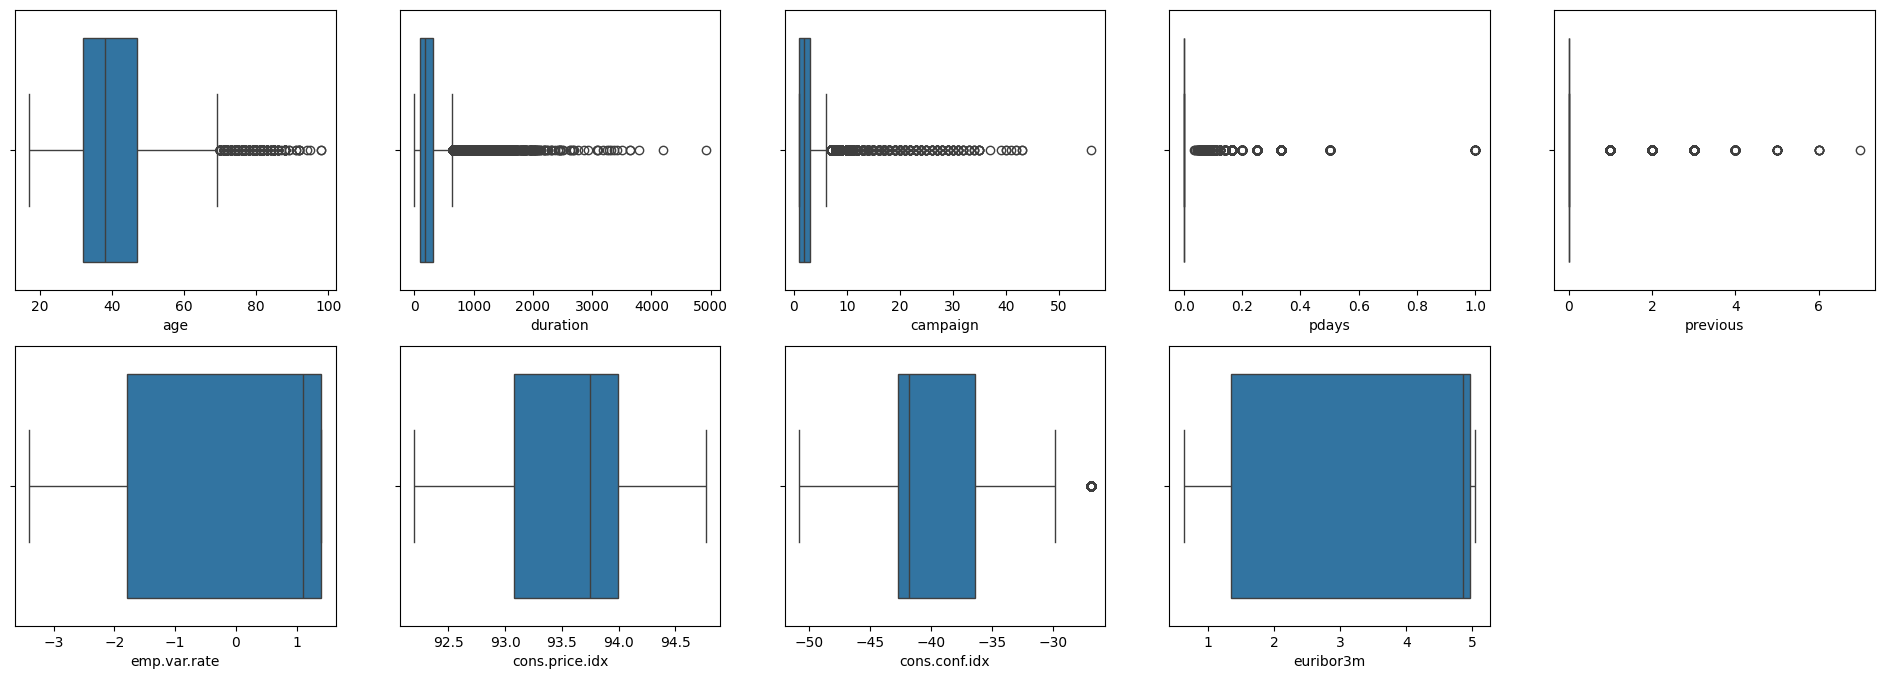

In [46]:
plt.figure(figsize=(24,8))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=df[num_cols[i]])
    
plt.show()

In [47]:
df['pdays'] = np.where(df['pdays']==float('inf'),0.001001,df['pdays'])

In [48]:
df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.96,0.97,0.98,0.99])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.009431,0.173013,0.081922,93.575720,-40.502863,3.621293
std,10.42068,259.305321,2.770318,0.051934,0.494964,1.570883,0.578839,4.627860,1.734437
min,17.00000,0.000000,1.000000,0.001001,0.000000,-3.400000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,0.001001,0.000000,-3.400000,92.201000,-49.500000,0.658000
2%,24.00000,17.000000,1.000000,0.001001,0.000000,-3.400000,92.379000,-47.100000,0.714000
3%,25.00000,23.000000,1.000000,0.001001,0.000000,-3.000000,92.431000,-47.100000,0.720000
4%,25.00000,29.000000,1.000000,0.001001,0.000000,-2.900000,92.469000,-47.100000,0.740000
5%,26.00000,36.000000,1.000000,0.001001,0.000000,-2.900000,92.713000,-47.100000,0.797000
50%,38.00000,180.000000,2.000000,0.001001,0.000000,1.100000,93.749000,-41.800000,4.857000


In [49]:
def clip(x):
    x= x.clip(upper=x.quantile(0.99))
    x= x.clip(lower=x.quantile(0.01))
    return x

In [50]:
df[num_cols] = df[num_cols].apply(clip)

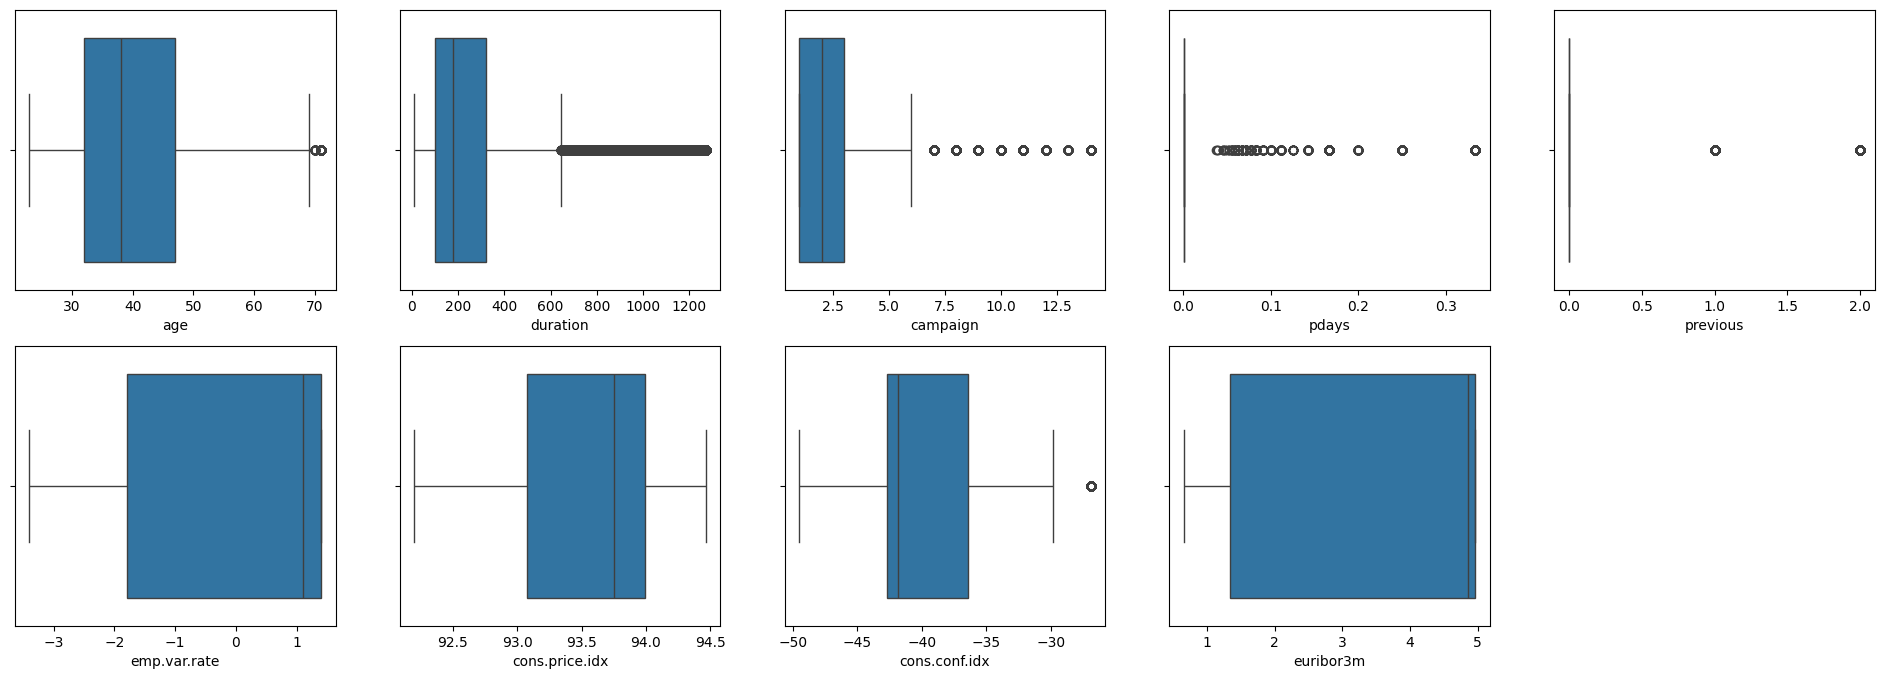

In [51]:
plt.figure(figsize=(24,8))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=df[num_cols[i]])
    
plt.show()

In [52]:
cat_cols = df.dtypes[df.dtypes=='object'].index

In [53]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week'],
      dtype='object')

In [54]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

In [55]:
df

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,school,no,no,no,may,mon,261.0,1,0.001001,0,1.1,93.994,-36.4,4.857,0
1,57,services,married,high.school,unknown,no,no,may,mon,149.0,1,0.001001,0,1.1,93.994,-36.4,4.857,0
2,37,services,married,high.school,no,yes,no,may,mon,226.0,1,0.001001,0,1.1,93.994,-36.4,4.857,0
3,40,admin.,married,school,no,no,no,may,mon,151.0,1,0.001001,0,1.1,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,no,yes,may,mon,307.0,1,0.001001,0,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,71,retired,married,professional.course,no,yes,no,nov,fri,334.0,1,0.001001,0,-1.1,94.465,-49.5,1.028,1
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383.0,1,0.001001,0,-1.1,94.465,-49.5,1.028,0
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189.0,2,0.001001,0,-1.1,94.465,-49.5,1.028,0
41186,44,services,married,professional.course,no,no,no,nov,fri,442.0,1,0.001001,0,-1.1,94.465,-49.5,1.028,1


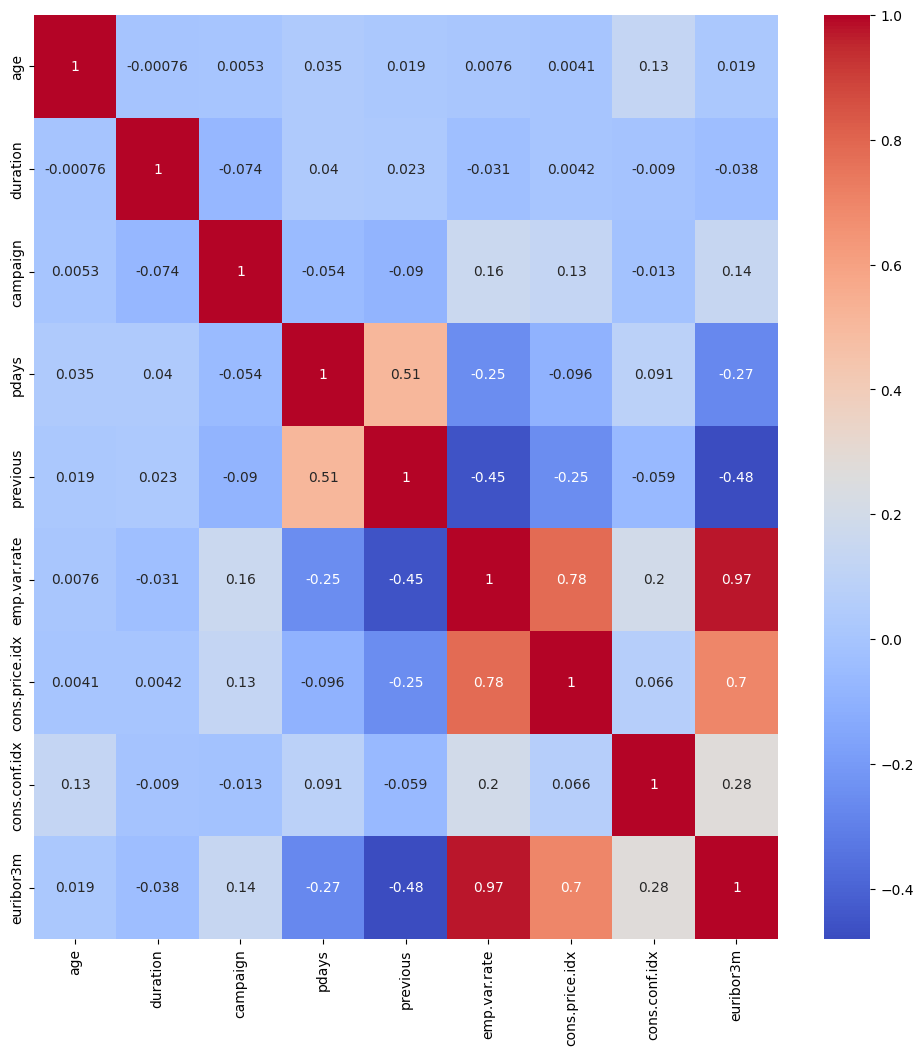

In [56]:
plt.figure(figsize=(12,12))
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [104]:
#sns.__version__

'0.12.2'

In [108]:
#pip install seaborn --upgrade

In [57]:
df.drop(columns=['euribor3m'],inplace=True)

In [64]:
df.drop(columns=['cons.price.idx'],inplace=True)

In [104]:
df.reset_index(inplace=True)
df

,index,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y
0,0,56,housemaid,married,school,no,no,no,may,mon,261.0,1,0.001001,0,1.1,-36.4,0
1,1,57,services,married,high.school,unknown,no,no,may,mon,149.0,1,0.001001,0,1.1,-36.4,0
2,2,37,services,married,high.school,no,yes,no,may,mon,226.0,1,0.001001,0,1.1,-36.4,0
3,3,40,admin.,married,school,no,no,no,may,mon,151.0,1,0.001001,0,1.1,-36.4,0
4,4,56,services,married,high.school,no,no,yes,may,mon,307.0,1,0.001001,0,1.1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41183,71,retired,married,professional.course,no,yes,no,nov,fri,334.0,1,0.001001,0,-1.1,-49.5,1
41172,41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383.0,1,0.001001,0,-1.1,-49.5,0
41173,41185,56,retired,married,university.degree,no,yes,no,nov,fri,189.0,2,0.001001,0,-1.1,-49.5,0
41174,41186,44,services,married,professional.course,no,no,no,nov,fri,442.0,1,0.001001,0,-1.1,-49.5,1


In [105]:
df.dtypes[df.dtypes!='object'].index

Index(['index', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [106]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']

In [107]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week'],
      dtype='object')

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc = StandardScaler()

In [110]:
df_num = df[num_cols]

In [111]:
df_cat = df[cat_cols]

In [112]:
df_num_sc = pd.DataFrame(sc.fit_transform(df_num),columns=num_cols)

In [113]:
df_num_sc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx
0,1.580634,0.028015,-0.651907,-0.176128,-0.374920,0.648101,0.887890
1,1.679278,-0.448159,-0.651907,-0.176128,-0.374920,0.648101,0.887890
2,-0.293601,-0.120789,-0.651907,-0.176128,-0.374920,0.648101,0.887890
3,0.002331,-0.439655,-0.651907,-0.176128,-0.374920,0.648101,0.887890
4,1.580634,0.223586,-0.651907,-0.176128,-0.374920,0.648101,0.887890
...,...,...,...,...,...,...,...
41171,3.060294,0.338378,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215
41172,0.594195,0.546704,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215
41173,1.580634,-0.278097,-0.217387,-0.176128,-0.374920,-0.752402,-1.952215
41174,0.396907,0.797545,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215


In [114]:
df_cat_du = pd.get_dummies(df_cat,drop_first=True,dtype=int)

In [118]:
df1 = pd.concat([df_num_sc,df_cat_du],axis=1)

In [120]:
df1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.580634,0.028015,-0.651907,-0.176128,-0.374920,0.648101,0.887890,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1.679278,-0.448159,-0.651907,-0.176128,-0.374920,0.648101,0.887890,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.293601,-0.120789,-0.651907,-0.176128,-0.374920,0.648101,0.887890,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.002331,-0.439655,-0.651907,-0.176128,-0.374920,0.648101,0.887890,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1.580634,0.223586,-0.651907,-0.176128,-0.374920,0.648101,0.887890,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,3.060294,0.338378,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41172,0.594195,0.546704,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215,1,0,0,...,0,0,0,1,0,0,0,0,0,0
41173,1.580634,-0.278097,-0.217387,-0.176128,-0.374920,-0.752402,-1.952215,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41174,0.396907,0.797545,-0.651907,-0.176128,-0.374920,-0.752402,-1.952215,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
x = df1
y = df['y']

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [137]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    pre_can = precision_score(y_test,ypred,pos_label=1)
    rec_can = recall_score(y_test,ypred,pos_label=1)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc,
                           'Pre_Can':pre_can,'Recall_Can':rec_can},
                          index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df,ypred

In [138]:
lr = LogisticRegression(max_iter=1000)

In [139]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [140]:
lr_res,ypred_lr = eval_model(lr,x_train,y_train,x_test,y_test,'LogReg')
lr_res

Confusion_Matrix
 [[10643   318]
 [  835   557]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.64      0.40      0.49      1392

    accuracy                           0.91     12353
   macro avg       0.78      0.69      0.72     12353
weighted avg       0.89      0.91      0.90     12353



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
LogReg,0.907053,0.906662,0.636571,0.400144


In [141]:
dtc = DecisionTreeClassifier()

In [142]:
dtc_res,ypred_lr = eval_model(dtc,x_train,y_train,x_test,y_test,'DecTree')
dtc_res

Confusion_Matrix
 [[10215   746]
 [  678   714]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10961
           1       0.49      0.51      0.50      1392

    accuracy                           0.88     12353
   macro avg       0.71      0.72      0.72     12353
weighted avg       0.89      0.88      0.89     12353



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
DecTree,1.0,0.884724,0.489041,0.512931


In [144]:
params = {'criterion':['gini','entropy'],
          'max_depth':[2,5,8,10,12],
          'min_samples_split':[7,10,12,15],
          'min_samples_leaf':[2,5,8,10,12,15]}

In [147]:
search = RandomizedSearchCV(estimator=dtc,param_distributions=params,n_jobs=-1,cv=10)

In [148]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10, 12],
                                        'min_samples_leaf': [2, 5, 8, 10, 12,
                                                             15],
                                        'min_samples_split': [7, 10, 12, 15]})

In [149]:
search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_depth': 5,
 'criterion': 'gini'}

In [150]:
dtc2=DecisionTreeClassifier(**search.best_params_)

In [151]:
dtc2_res,ypred_lr = eval_model(dtc2,x_train,y_train,x_test,y_test,'DecTree(Hyperparameters)')
dtc2_res

Confusion_Matrix
 [[10596   365]
 [  750   642]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.64      0.46      0.54      1392

    accuracy                           0.91     12353
   macro avg       0.79      0.71      0.74     12353
weighted avg       0.90      0.91      0.90     12353



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
DecTree(Hyperparameters),0.914998,0.909739,0.637537,0.461207


In [152]:
rf = RandomForestClassifier()

In [154]:
rf_res,ypred_lr = eval_model(rf,x_train,y_train,x_test,y_test,'RandomForest')
rf_res

Confusion_Matrix
 [[10579   382]
 [  737   655]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.63      0.47      0.54      1392

    accuracy                           0.91     12353
   macro avg       0.78      0.72      0.74     12353
weighted avg       0.90      0.91      0.90     12353



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
RandomForest,1.0,0.909415,0.63163,0.470546


In [157]:
rf_params = {'criterion':['gini','entropy'],
          'max_depth':[2,5,8,10,12],
          'min_samples_split':[7,10,12,15],
          'min_samples_leaf':[2,5,8,10,12,15],
            'bootstrap':[True],
             'max_features':['sqrt','log2'],
            'n_estimators':[20,50,100,150,200],
            'max_samples':[0.7,0.75]}


In [158]:
rf_search = RandomizedSearchCV(estimator=rf,param_distributions=rf_params,n_jobs=-1,cv=5)

In [159]:
rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.7, 0.75],
                                        'min_samples_leaf': [2, 5, 8, 10, 12,
                                                             15],
                                        'min_samples_split': [7, 10, 12, 15],
                                        'n_estimators': [20, 50, 100, 150,
                                                         200]})

In [160]:
rf_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 0.75,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini',
 'bootstrap': True}

In [161]:
rf2 = RandomForestClassifier(**rf_search.best_params_)

In [162]:
rf_res2,ypred_lr = eval_model(rf2,x_train,y_train,x_test,y_test,'RandomForest(Hyperparameter)')
rf_res2

Confusion_Matrix
 [[10768   193]
 [  921   471]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10961
           1       0.71      0.34      0.46      1392

    accuracy                           0.91     12353
   macro avg       0.82      0.66      0.70     12353
weighted avg       0.90      0.91      0.90     12353



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
RandomForest(Hyperparameter),0.927003,0.909819,0.709337,0.338362


In [164]:
feature_importance = pd.DataFrame(rf2.feature_importances_,index=df1.columns)

In [169]:
feature_importance.sort_values(by=0,ascending=False)

,0
duration,0.408370
pdays,0.124721
emp.var.rate,0.110902
cons.conf.idx,0.093612
age,0.049716
previous,0.030147
month_may,0.022052
month_mar,0.015888
campaign,0.015521
month_oct,0.015387


In [170]:
all_res = pd.concat([lr_res,dtc_res,dtc2_res,rf_res,rf_res2])
all_res

,Train_Acc,Test_Acc,Pre_Can,Recall_Can
LogReg,0.907053,0.906662,0.636571,0.400144
DecTree,1.000000,0.884724,0.489041,0.512931
DecTree(Hyperparameters),0.914998,0.909739,0.637537,0.461207
RandomForest,1.000000,0.909415,0.631630,0.470546
RandomForest(Hyperparameter),0.927003,0.909819,0.709337,0.338362
